In [1]:
import numpy as np
import gvar as gv
import sys
sys.path.append('../')
from h5glance import H5Glance 
import os
import lsqfit
import io
import yaml
import matplotlib
import matplotlib.pyplot as plt
import warnings  
warnings.simplefilter(action="default")
warnings.filterwarnings('ignore') 

In [2]:
os.chdir('../../nucleon_sigma/xpt')

In [3]:
import fit_analysis as fa 
import fit_routine as fit
import i_o
import priors
import fpi_fit
import mpi_fit

In [4]:
from priors import prior
prior = prior
#print(prior)

In [5]:
w0_a = gv.load('../data/a_fm_results.p').values()
print(w0_a)

[0.15036(98), 0.12055(83), 0.08722(67), 0.05686(49)]


In [6]:
gv.load('../data/w0_a_results.p')

BufferDict([('a15', 1.1343(14)), ('a12', 1.4147(36)), ('a09', 1.9552(84)), ('a06', 2.999(18))])

In [7]:
#FIND BETTER WAY TO LOAD IN MODEL VIA CLI PROMPT#

f = open('models.yaml', 'r')
models = yaml.load(f,Loader=yaml.FullLoader)
    #print(keys)
model_info = {}
for item in models.values():
        #smodel_info = item['m_p:s_lo:d_lo:x_lo:l_lo:fpi']
        #model_info = item['eps_p:s_n4lo:d_n4lo:x_n4lo:l_n4lo:fpi']
        #model_info = item['eps_p:taylor:l_lo']
        model_info = item['eps_p:taylor:l_n4lo:d_lo']
        #model_info = item['eps_p:taylor:l_n2lo']
        #model_info = item['eps_p:taylor:l_n2lo:x_lo']
        #model_info = item['eps_p:l_n2lo:xpt_lo']
        #model_info = item['eps_p:taylor:l_lo:x_lo']
        model_info_sigma = item['eps_p:taylor:l_n4lo:d_lo:sigma_pi']
        model_info_fpi = item['fpi:l_n2lo:d_n2lo:x_n2lo']
        #model_info_fpi = item['fpi:l4_bar']
        model_info_simul = item['simul:taylor:l_lo:x_lo:d_lo']
        model_info_mpi = item['mpi:l_n2lo:d_n2lo:x_n2lo']

#print(model_info)

In [8]:
input_output = i_o.InputOutput()
data,ensembles = input_output.get_data(scheme='w0_org',units='phys',include_phys=False)
#ensembles.clear
#ensembles.insert['a09m135','a09m220']
new_prior = input_output.make_prior(data,prior)
phys_point_data = input_output.get_data_phys_point()

In [9]:
data
#data['m_pi']**2 / 2*data['m_q'] *data['m_q']**2

{'m_k': array([0.218500(78), 0.228703(91), 0.24110(14), 0.30212(11), 0.31003(17),
        0.38753(14), 0.38691(21)], dtype=object),
 'm_pi': array([0.059444(63), 0.097896(63), 0.14074(12), 0.08129(16), 0.13427(17),
        0.102925(69), 0.16531(19)], dtype=object),
 'eps_pi': array([0.11619(33), 0.18197(37), 0.24619(44), 0.11360(33), 0.18220(44),
        0.11492(20), 0.18084(31)], dtype=object),
 'lam_chi': array([0.5116(13), 0.53796(99), 0.57167(85), 0.7155(14), 0.7369(16),
        0.8956(14), 0.9141(11)], dtype=object),
 'm_proton': array([0.4240(32), 0.4353(95), 0.4914(29), 0.573(10), 0.6164(23),
        0.7250(78), 0.7575(44)], dtype=object),
 'm_delta': array([0.6109(57), 0.587(29), 0.637(30), 0.836(12), 0.8576(41), 1.106(13),
        1.0702(76)], dtype=object),
 'eps_proton': array([0.8287(63), 0.809(17), 0.8597(52), 0.801(15), 0.8366(36),
        0.8095(86), 0.8286(50)], dtype=object),
 'Fpi': array([91.40(77), 96.11(80), 102.14(84), 92.66(69), 95.42(72), 94.26(65),
        96.2

In [10]:
np.log(phys_point_data['eps_pi']**2)

-4.300(13)

phys

In [11]:
from importlib import reload
reload(fa)
fit_analysis = fa.fit_analysis(phys_point_data=phys_point_data, data=data,model_info=model_info, prior=prior)
#extrap_mass = fit_analysis._extrapolate_to_ens(phys_params=None)
extrap_mass = fit_analysis.fitfcn(particle='proton')
extrap_mass_phys = extrap_mass * phys_point_data['lam_chi']
#test = fit_analysis.fitfcn(particle='sigma_pi')
print(extrap_mass)

0.8308(79)


In [12]:
fit_fpi = fpi_fit.fit_routine(prior=new_prior, data=data, model_info=model_info_fpi)
fit_fpi_out = fit_fpi.fit
extrap_fpi = fpi_fit.Fpi(datatag='Fpi',model_info=model_info_fpi)
extrap = extrap_fpi.fitfcn(p=fit_fpi_out.p)
#print(fit_fpi_out)
print( '\n','ens:',ensembles,'\n','extrapolation:',extrap, '\n',fit_fpi_out.format(True))
#print('extrapolation:','\n','M_0/lam_chi:',extrap_mass, '\n','M_0(meV):',extrap_mass_phys,'\n',fit_fpi_out)


 ens: ['a09m135', 'a09m220', 'a09m310', 'a12m130', 'a12m220', 'a15m135XL', 'a15m220'] 
 extrapolation: [91.71(63) 93.32(49) 104.11(75) 93.57(53) 94.92(58) 94.57(53) 95.78(54)] 
 Least Square Fit:
  chi2/dof [dof] = 4.2 [7]    Q = 0.00011    logGBF = -47.047

Parameters:
             F0         29 (25)      [       85 (30) ]  *
         l4_bar       4.5 (1.5)      [     4.0 (4.0) ]  
     d_{fpi,ll}     -4e-17 +- 4      [     0.0 (4.0) ]  
           c_2F        -44 (18)      [        0 (20) ]  **
      d_{fpi,a}      0.056 (99)      [     0.0 (4.0) ]  
     d_{fpi,aa}      -0.12 (25)      [     0.0 (4.0) ]  
     d_{fpi,al}      -1.5 (3.9)      [     0.0 (4.0) ]  
           c_1F     -2.012 (24)      [        0 (20) ]  
       eps_pi 0    0.11620 (33)      [  0.11619 (33) ]  
              1    0.18204 (37)      [  0.18197 (37) ]  
              2    0.24607 (44)      [  0.24619 (44) ]  
              3    0.11361 (33)      [  0.11360 (33) ]  
              4    0.18222 (44)      [  0

In [13]:
fit_mp = fit.fit_routine(prior=new_prior, data=data, model_info=model_info)
fit_mp_out = fit_mp.fit
print('extrapolation:','\n','M_0/lam_chi:',extrap_mass, '\n','M_0(meV):',extrap_mass_phys,'\n',fit_mp_out)

extrapolation: 
 M_0/lam_chi: 0.8308(79) 
 M_0(meV): 961(11) 
 Least Square Fit:
  chi2/dof [dof] = 1.1 [7]    Q = 0.39    logGBF = 9.8371

Parameters:
   m_{proton,0}      0.819 (16)      [     0.90 (40) ]  
   b_{proton,2}       0.6 (1.3)      [     2.0 (2.0) ]  
         l4_bar      -0.70 (65)      [     4.0 (4.0) ]  *
   b_{proton,4}      -0.1 (2.0)      [     0.0 (2.0) ]  
   b_{proton,6}    -0.01 (2.00)      [     0.0 (2.0) ]  
   d_{proton,a}     -0.090 (53)      [     0.0 (5.0) ]  
       eps_pi 0    0.11615 (33)      [  0.11619 (33) ]  
              1    0.18199 (37)      [  0.18197 (37) ]  
              2    0.24620 (44)      [  0.24619 (44) ]  
              3    0.11363 (33)      [  0.11360 (33) ]  
              4    0.18211 (42)      [  0.18220 (44) ]  
              5    0.11493 (20)      [  0.11492 (20) ]  
              6    0.18083 (30)      [  0.18084 (31) ]  
       eps2_a 0   0.065325 (70)      [ 0.065325 (70) ]  
              1   0.066506 (83)      [ 0.066506 (

In [14]:
fit_mpi = mpi_fit.fit_routine(prior=new_prior, data=data, model_info=model_info_mpi)
fit_mpi_out = fit_mpi.fit
extrap_mpi = mpi_fit.Mpi(datatag='mpi',model_info=model_info_mpi)
extrap = extrap_mpi.fitfcn(p=fit_mpi_out.p)
#print(fit_fpi_out)
print( '\n','ens:',ensembles,'\n','extrapolation:',extrap, '\n',fit_mpi_out.format(True))

KeyError: 'l_3'

In [ ]:
l4 = fit_fpi_out.p['l4_bar']
l4

3.8(2.2)

In [ ]:
fit_mp = fit.fit_routine(prior=new_prior, data=data, model_info=model_info)
fit_mp_out = fit_mp.fit
print('extrapolation:','\n','M_0/lam_chi:',extrap_mass, '\n','M_0(meV):',extrap_mass_phys,'\n',fit_mp_out)

extrapolation: 
 M_0/lam_chi: 0.82(25) 
 M_0(meV): 944(294) 
 Least Square Fit:
  chi2/dof [dof] = 0.65 [2]    Q = 0.52    logGBF = -0.19047

Parameters:
   m_{proton,0}         0.85 (25)       [     0.90 (40) ]  
   b_{proton,2}         1.4 (1.9)       [     2.0 (2.0) ]  
         l4_bar        -0.3 (1.2)       [     4.0 (4.0) ]  *
   b_{proton,4}       0.02 (2.00)       [     0.0 (2.0) ]  
   b_{proton,6}   0.0008 (2.0000)       [     0.0 (2.0) ]  
   d_{proton,a}         0.2 (3.9)       [     0.0 (5.0) ]  
       eps_pi 0      0.11619 (33)       [  0.11619 (33) ]  
              1      0.18197 (37)       [  0.18197 (37) ]  
       eps2_a 0     0.065325 (70)       [ 0.065325 (70) ]  
              1     0.066506 (83)       [ 0.066506 (83) ]  
         m_pi 0     205197 (3353)       [ 205202 (3353) ]  
              1     215795 (3509)       [ 215793 (3509) ]  
      lam_chi 0       0.5115 (13)       [   0.5116 (13) ]  
              1      0.53797 (99)       [  0.53796 (99) ]  

Sett

In [ ]:
from importlib import reload
reload(fa)
fit_analysis = fa.fit_analysis(phys_point_data=phys_point_data, data=data,model_info=model_info, prior=prior)
#extrap_mass = fit_analysis._extrapolate_to_ens(phys_params=None)
extrap_mass = fit_analysis.fitfcn(particle='proton')
extrap_mass_phys = extrap_mass * phys_point_data['lam_chi']
#test = fit_analysis.fitfcn(particle='sigma_pi')
print(extrap_mass, extrap_mass_phys)

0.82(25) 944(294)


In [ ]:
# from importlib import reload
# reload(fa)
# fit_analysis_sigma = fa.fit_analysis(phys_point_data=phys_point_data, data=data,model_info=model_info_sigma, prior=prior)
# test = fit_analysis.fitfcn(particle='proton')

In [ ]:
fit_mp.extrapolate

In [ ]:
fit_analysis_sigma = fa.fit_analysis(phys_point_data=phys_point_data, data=data,model_info=model_info_sigma, prior=prior)
extrap_mass_deriv = fit_analysis_sigma._extrapolate_to_ens(phys_params='proton')
extrap_mass_deriv = fit_analysis.fitfcn(p=fit_sigma_out.y, data=phys_point_data)
m_proton_deriv =  extrap_mass_deriv['proton'][8]
print(m_proton_deriv)

KeyError: 'eps_sigma_pi_n'

In [ ]:
reload(io)
m_pi = phys_point_data['m_pi']
lam_chi = phys_point_data['lam_chi']
m_proton = fit_mp_out.p['m_{proton,0}']
e_pi = m_pi / lam_chi
sigma = m_pi**2 *gv.deriv(m_proton, m_pi**2)
l3 = gv.gvar('3.53(26)')
l4 = gv.gvar('4.73(10)')
term_0 = lam_chi * e_pi/2 * m_proton_deriv
term_1 = lam_chi * e_pi/2 * m_proton_deriv * e_pi**2*(5/2 - l3/2 - 2*l4 )
term_2 = e_pi**2 * m_proton*(l4-1)
sigma = term_0 + term_1 + term_2
print(term_0,term_1,term_2,sigma)
sigma_analytic = (e_pi/2 * (1 + e_pi**2*(5/2 - l3/2 - 2*l4 )) *m_proton_deriv) * lam_chi
print('sigma w/ gv.deriv:',sigma)
print('sigma analytic:',sigma_analytic)


NameError: name 'm_proton_deriv' is not defined

In [ ]:
from importlib import reload
reload(fa)
fit_analysis = fa.fit_analysis(phys_point_data=phys_point_data, data=data,model_info=model_info, prior=prior)
#extrap_mass = fit_analysis._extrapolate_to_ens(phys_params=None)
extrap_mass = fit_analysis.fitfcn()
print(extrap_mass)

{'m_{proton,0}': 0.8093(63), 'b_{proton,4}': 1.2(1.5), 'b_{proton,6}': 0.2(2.0), 'b_{proton,2}': 0.74(18), 'd_{proton,a}': -0.034(23), 'eps2_a': 0(0), 'a': 0(0), 'alpha_s': 0(0), 'L': inf(0), 'hbarc': 197.327(0), 'lam_chi': 1157.0(7.2), 'm_pi': 134.80(30), 'm_k': 494.20(30), 'eps_pi': 0.11651(77), 'eps_k': 0.4271(27), 'm_proton': 938.9187470(42), 'eps_proton': 0.8115(50), 'm_delta': 1232.0(2.0), 'eps_delta': 1.0648(68)}
{'proton': 0.8195(47)}


In [ ]:
# fit_analysis_sigma = fa.fit_analysis(phys_point_data=phys_point_data, data=data,model_info=model_info_sigma, prior=prior)
# extrap_mass_deriv = fit_analysis_sigma._extrapolate_to_ens(phys_params='proton')
# extrap_mass_deriv = fit_analysis.fitfcn(p=fit_sigma_out.y, data=phys_point_data)
# m_proton_deriv =  extrap_mass_deriv['proton'][8]
# print(m_proton_deriv)

In [ ]:
def plot_parameters(xparam='ens', yparam='l4'):
        # if yparam is None:
        #     yparam = 'eps_proton'

    x = {}
    y = {}
    c = {}
    fit = {}

    #plt.axes([0.145,0.145,0.85,0.85])
        
    colors = {
        '06' : '#6A5ACD',
        '09' : '#51a7f9',
        '12' : '#70bf41',
        '15' : '#ec5d57',
    }
    for ens in ensembles:
        a = ens.split('m')[0]
        m = ens[3:7]

    for i in  range(len(ensembles)):
        for j, param in enumerate([xparam, yparam]):
            if param == 'mp':
                value = fit_mp_out.y['proton'][i]
                label = '$\epsilon_p$'

            elif param == 'eps_pi':
                value = fit_mp_out.p['eps_pi'][i]
                label = '$\epsilon_\pi$'

            elif param == 'eps2_a':
                value = fit_mp_out.p['eps2_a'][i]
                label = '$\epsilon_a^2$'

            elif param == 'l4':
                value = fit_fpi_out.p['l4_bar']
                label = '$l4$'
                print(value)

            elif param =='ens':
                value = a[i]
                label = str(a)

            # elif param == 'a':
            #     value = ensembles
            #     label = '$a$'

            
            if j == 0:
                x[i] = value
                xlabel = label
            elif j == 1:
                y[i] = value
                ylabel = label

    

    C = gv.evalcov(y)
        
    plt.plot(gv.mean(y), marker='o', mec='w')

        # C = gv.evalcov([x[i], y[i]])
        # eVe, eVa = np.linalg.eig(C)
        # for e, v in zip(eVe, eVa.T):
        #     plt.plot([gv.mean(x[i])-1*np.sqrt(e)*v[0], 1*np.sqrt(e)*v[0] + gv.mean(x[i])],
        #             [gv.mean(y[i])-1*np.sqrt(e)*v[1], 1*np.sqrt(e)*v[1] + gv.mean(y[i])],
        #                 alpha=1.0, lw=2)
        #     plt.plot(gv.mean(x[i]), gv.mean(y[i]), 
        #                 marker='o', mec='w', zorder=3)


    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),
        ncol=len(by_label), bbox_to_anchor=(0,1), loc='lower left')
    plt.grid()
    plt.xlabel(xlabel, fontsize = 24)
    plt.ylabel(ylabel, fontsize = 24)
    plt.axvline(gv.mean(phys_point_data['eps_pi']), ls='--', label='phys. point')

    fig = plt.gcf()
    plt.close()
    return fig

4.02 4.02
1.6163144938220535 6.039822028894022


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

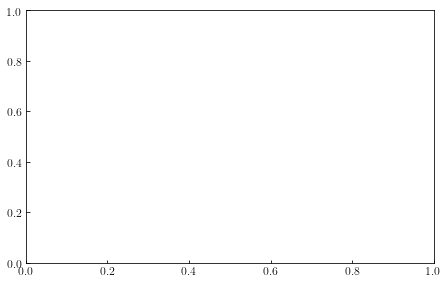

In [ ]:
import matplotlib.pyplot as plt
eff = fit_fpi_out.p['l4_bar']
m   = eff.mean
dm  = eff.sdev
##x = np.linspace(0,1)
#ax_meff = {}
ax_meff= plt.axes([0.15,0.15,0.84,0.84])
p = prior['l4_bar']
print(p.mean,p.sdev)
pm = lambda g, k : gv.mean(g) + k *gv.sdev(g)
print(pm(eff, -1), pm(eff, +1))
plt.fill_between(gv.mean(eff), pm(eff, -1), pm(eff, +1))
#ax_meff.axhspan(p.mean-p.sdev, p.mean+p.sdev, color='k',alpha=.2)
#plot.plot_eff(ax_meff[k], gv_data, k, mtype=fp.corr_lst[k]['type'], colors=clrs)
#ax_meff.errorbar(m,dm, linestyle='None', marker='o',mfc='None')#, label=label)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
eff = fit_fpi_out.p['l4_bar']
m   = eff.mean
dm  = eff.sdev
min_max = lambda arr : (np.nanmin(arr), np.nanmax(arr))
#min_val, max_val = min_max(data['eps_pi'])

#eps_pi = np.linspace(gv.mean(min_val), gv.mean(max_val))

pm = lambda g, k : gv.mean(g) + k *gv.sdev(g)
plt.show()

#ax.errorbar(x, m, yerr=dm, linestyle='None', marker='o',mfc='None', label=label)


TypeError: gca() takes 0 positional arguments but 1 was given

3.8(2.2)
3.8(2.2)


TypeError: object of type 'NoneType' has no len()

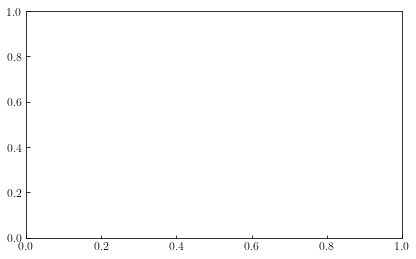

In [ ]:
plot_parameters(xparam='ens', yparam='l4')

3.8(2.2)
3.8(2.2)


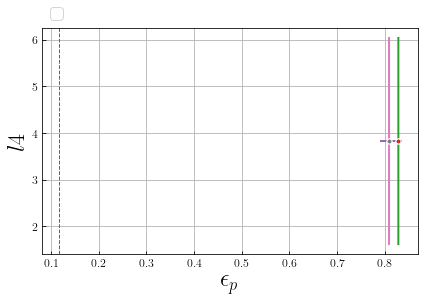

In [ ]:
plot_parameters(xparam='mp', yparam='l4')

In [ ]:
y_fit = fit_analysis.fitfcn(particle='proton')
np.repeat(y_fit,16)

{'m_{proton,0}': 0.8093(63), 'b_{proton,4}': 1.2(1.5), 'b_{proton,6}': 0.2(2.0), 'b_{proton,2}': 0.74(18), 'd_{proton,a}': -0.034(23), 'eps2_a': 0(0), 'a': 0(0), 'alpha_s': 0(0), 'L': inf(0), 'hbarc': 197.327(0), 'lam_chi': 1157.0(7.2), 'm_pi': 134.80(30), 'm_k': 494.20(30), 'eps_pi': 0.11651(77), 'eps_k': 0.4271(27), 'm_proton': 938.9187470(42), 'eps_proton': 0.8115(50), 'm_delta': 1232.0(2.0), 'eps_delta': 1.0648(68)}


array([0.8195(47), 0.8195(47), 0.8195(47), 0.8195(47), 0.8195(47),
       0.8195(47), 0.8195(47), 0.8195(47), 0.8195(47), 0.8195(47),
       0.8195(47), 0.8195(47), 0.8195(47), 0.8195(47), 0.8195(47),
       0.8195(47)], dtype=object)

In [ ]:
def plot_fit(xparam=None, yparam='mp'):
        if yparam is None:
            yparam = 'eps_proton'

        x = {}
        y = {}
        c = {}
        #fit = {}

        #plt.axes([0.145,0.145,0.85,0.85])
            
        colors = {
            '06' : '#6A5ACD',
            '09' : '#51a7f9',
            '12' : '#70bf41',
            '15' : '#ec5d57',
        }

        for i in  range(len(ensembles)):
            for j, param in enumerate([xparam, yparam]):
                if param == 'mp':
                    value = fit_mp_out.y['proton'][i]
                    label = '$\epsilon_p$'

                elif param == 'eps_pi':
                    value = fit_mp_out.p['eps_pi'][i]
                    label = '$\epsilon_\pi$'
                    #min,max linspace

                elif param == 'eps2_a':
                    value = fit_mp_out.p['eps2_a'][i]
                    label = '$\epsilon_a^2$'


                if j == 0:
                    x[i] = value
                    xlabel = label
                elif j == 1:
                    y[i] = value
                    ylabel = label
        min_max = lambda arr : (np.nanmin(arr), np.nanmax(arr))
        min_val, max_val = min_max(data['eps_pi'])

        eps_pi = np.linspace(gv.mean(min_val), gv.mean(max_val))

        posterior = {}
        posterior.update(fit_mp_out.p)
        posterior['eps_pi'] = eps_pi

        #y_fit = fit.fcn(posterior)['eps_proton']
        y_fit = fit_analysis.fitfcn(particle='proton')

        pm = lambda g, k : gv.mean(g) + k *gv.sdev(g)
        plt.fill_between(gv.mean(eps_pi), pm(y_fit, -1), pm(y_fit, +1))
        plt.show()
        
        print(y_fit,value)

       

        for i in range(len(ensembles)):
            C = gv.evalcov([x[i], y[i]])
            eVe, eVa = np.linalg.eig(C)
            for e, v in zip(eVe, eVa.T):
                plt.plot([gv.mean(x[i])-1*np.sqrt(e)*v[0], 1*np.sqrt(e)*v[0] + gv.mean(x[i])],
                        [gv.mean(y[i])-1*np.sqrt(e)*v[1], 1*np.sqrt(e)*v[1] + gv.mean(y[i])],
                         alpha=1.0, lw=2)
                plt.plot(gv.mean(x[i]), gv.mean(y[i]), 
                          marker='o', mec='w', zorder=3)


        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(),
            ncol=len(by_label), bbox_to_anchor=(0,1), loc='lower left')
        plt.grid()
        plt.xlabel(xlabel, fontsize = 24)
        plt.ylabel(ylabel, fontsize = 24)
        plt.axvline(gv.mean(phys_point_data['eps_pi']), ls='--', label='phys. point')

        fig = plt.gcf()
        plt.close()
        return fig

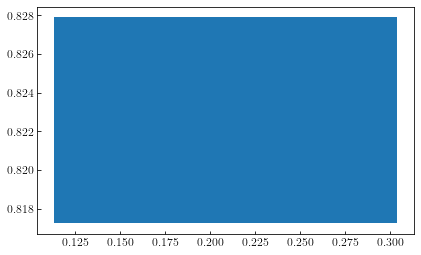

0.8226(53) 0.8860(36)


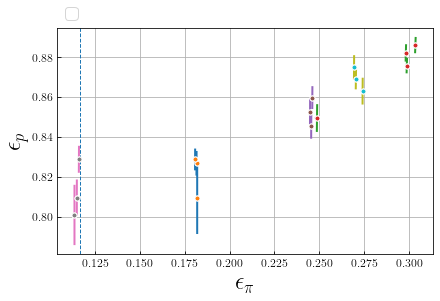

In [ ]:
plot_fit(xparam='eps_pi', yparam='mp')

In [ ]:
reload(io)
m_pi = phys_point_data['m_pi']
lam_chi = phys_point_data['lam_chi']
m_proton = fit_mp_out.p['m_{proton,0}']
e_pi = m_pi / lam_chi
sigma = m_pi**2 *gv.deriv(m_proton, m_pi**2)
l3 = gv.gvar('3.53(26)')
l4 = gv.gvar('4.73(10)')
term_0 = lam_chi * e_pi/2 * m_proton_deriv
term_1 = lam_chi * e_pi/2 * m_proton_deriv * e_pi**2*(5/2 - l3/2 - 2*l4 )
term_2 = e_pi**2 * m_proton*(l4-1)
sigma = term_0 + term_1 + term_2
print(term_0,term_1,term_2,sigma)
sigma_analytic = (e_pi/2 * (1 + e_pi**2*(5/2 - l3/2 - 2*l4 )) *m_proton_deriv) * lam_chi
print('sigma w/ gv.deriv:',sigma)
print('sigma analytic:',sigma_analytic)


NameError: name 'm_proton_deriv' is not defined